In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import timeit
from datetime import datetime
%load_ext tensorboard

In [2]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
x = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.float64)
tf.print(x)

[[1 2 3]
 [4 5 6]]


In [4]:
x.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]])

In [5]:
np.array(x)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [6]:
x.shape

TensorShape([2, 3])

In [7]:
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[14., 32.],
       [32., 77.]])>

In [8]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [9]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


In [10]:
tf.reshape(x, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]])>

In [11]:
y = tf.reshape(x, [-1]) # flattening
y

<tf.Tensor: shape=(6,), dtype=float64, numpy=array([1., 2., 3., 4., 5., 6.])>

In [12]:
x.shape

TensorShape([2, 3])

In [13]:
y = tf.nn.softmax(x)
tf.reduce_sum(y)

<tf.Tensor: shape=(), dtype=float64, numpy=1.9999999999999998>

In [14]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float64, numpy=21.0>

In [15]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


In [16]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [17]:
ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

In [18]:
ragged_tensor

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>

In [19]:
var1 = tf.Variable([2, 3, 4], dtype=tf.int64, name="Variable 1")

In [20]:
var1.assign_add([6, 8, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int64, numpy=array([ 8, 11,  5])>

In [21]:
var1.assign_sub([3, 7, 0])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int64, numpy=array([5, 4, 5])>

In [22]:
with tf.device('CPU:0'):

  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [23]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


In [24]:
x = tf.Variable(3, dtype=tf.float64)

In [25]:
with tf.GradientTape() as tape:
    y = pow(x, 2)
dy_dx = tape.gradient(y, x)
#dy_dx.numpy()
np.array(dy_dx)

array(6.)

In [26]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]
#x = tf.constant(x, dtype=tf.float64)
with tf.GradientTape(persistent=True) as tape:
    y = x @ w + b
    loss = tf.reduce_mean(pow(y, 2))
my_vars = {'w':w, 'b': b}
grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.4258504, -4.4367743], dtype=float32)>

In [27]:
dl_dw, dl_db = tape.gradient(loss, [w, b])

In [28]:
dl_dw.shape

TensorShape([3, 2])

In [29]:
del tape

In [30]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [31]:
for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


In [32]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)
[var.name for var in tape.watched_variables()]

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


['x0:0']

In [33]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [34]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = pow(x, 4)

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


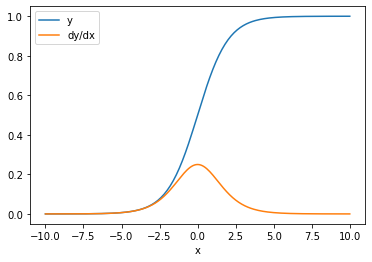

In [35]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

In [36]:
c = tf.Variable(2.0)
for epoch in range(2):
    with tf.GradientTape() as tape:
        y = c ** 3
        print(type(c).__name__, ":", tape.gradient(y, c))
        c = c * 2

ResourceVariable : tf.Tensor(12.0, shape=(), dtype=float32)
EagerTensor : None


In [37]:
x = tf.constant(10, dtype=tf.float64)

with tf.GradientTape() as g:
  g.watch(x)
  y = x * x

print(g.gradient(y, x))

tf.Tensor(20.0, shape=(), dtype=float64)


In [38]:
x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape() as tape:
  z = y**2
print(tape.gradient(z, x, unconnected_gradients=tf.UnconnectedGradients.ZERO))

tf.Tensor([0. 0.], shape=(2,), dtype=float32)


In [39]:
a = tf.Variable(6.5)
b = tf.constant(4.5, dtype=tf.float32)
e = tf.Variable(3, dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(b)
    r = pow(a, 3) +  e ** 2
print(tape.gradient(r, b, unconnected_gradients = tf.UnconnectedGradients.ZERO))

tf.Tensor(0.0, shape=(), dtype=float32)


In [40]:
# Define a nromal Python function
def a_regular_function(x, y, b):
    x = tf.matmul(x, y)
    x = x + b
    return x
a_function_that_uses_a_graph = tf.function(a_regular_function) # this is a TensorFlow `Function`
# Make some tensors.
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)

In [41]:
def inner_function(x, y, b):
    x = x @ y
    x = x + b
    return x

# Use decorator to make outer function a `Function`
@tf.function
def outer_function(x):
    y = tf.constant([[2.0], [3.0]])
    b = tf.constant(4.0)
    
    return inner_function(x, y, b)
# Note that the callable will create a graph that includes `inner_function` as well as `outer_function`.
outer_function(tf.constant([[1.0, 2.]])).numpy()

array([[12.]], dtype=float32)

In [42]:
def simple_relu(x):
  if tf.greater(x, 0):
    return x
  else:
    return 0

# `tf_simple_relu` is a TensorFlow `Function` that wraps `simple_relu`.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(6)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 6
Second branch, with graph: 0


In [43]:
# This is the graph-generating output of AutoGraph.
#print(tf.autograph.to_code(simple_relu))

In [44]:
# This is the graph itself.
#print(tf_simple_relu.get_concrete_function(tf.constant(6)).graph.as_graph_def())

In [45]:
@tf.function
def get_MSE(y_true, y_pred):
    sqd_diff = tf.pow(y_true - y_pred, 2)
    return tf.reduce_mean(sqd_diff)

In [46]:
y_true = tf.random.uniform([5], maxval=10, dtype=tf.int32)
y_pred = tf.random.uniform([5], maxval=10, dtype=tf.int32)
print(y_true)
print(y_pred)

tf.Tensor([0 9 6 6 0], shape=(5,), dtype=int32)
tf.Tensor([4 9 6 4 8], shape=(5,), dtype=int32)


In [47]:
get_MSE(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=16>

In [48]:
tf.config.run_functions_eagerly(True)
get_MSE(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=16>

In [49]:
tf.config.run_functions_eagerly(False)

In [50]:
@tf.function
def get_MSE(y_true, y_pred):
    print("Calculating MSE!")
    sqd_diff = tf.pow(y_true - y_pred, 2)
    return tf.reduce_mean(sqd_diff)

In [51]:
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!


In [52]:
tf.config.run_functions_eagerly(True)

In [53]:
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!
Calculating MSE!
Calculating MSE!


In [54]:
tf.config.run_functions_eagerly(False)

In [55]:
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

In [56]:
@tf.function
def get_MSE(y_true, y_pred):
    tf.print("Calculating MSE!")
    sqd_diff = tf.pow(y_true - y_pred, 2)
    return tf.reduce_mean(sqd_diff)

In [57]:
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!
Calculating MSE!
Calculating MSE!


### Defining Models and Layers in TensorFLow

In [58]:
class SimpleModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name) # gives access to the methods and properties of the Module class
    self.a_variable = tf.Variable(5.0, name="train_me")
    self.non_trainable_variable = tf.Variable(5.0, trainable=False, name="do_not_train_me")
  def __call__(self, x): # Python callable; makes the class instance callable
    return self.a_variable * x + self.non_trainable_variable

simple_module = SimpleModule(name="simple")

simple_module(tf.constant(8.0))

<tf.Tensor: shape=(), dtype=float32, numpy=45.0>

In [59]:
# All trainable variables
print("trainable variables:", simple_module.trainable_variables)
# Every variable
print("all variables:", simple_module.variables)

trainable variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>,)
all variables: (<tf.Variable 'train_me:0' shape=() dtype=float32, numpy=5.0>, <tf.Variable 'do_not_train_me:0' shape=() dtype=float32, numpy=5.0>)


In [60]:
class Dense(tf.Module):
  def __init__(self, in_features, out_features, name=None):
    super().__init__(name=name)
    self.w = tf.Variable(
      tf.random.normal([in_features, out_features]), name='w')
    self.b = tf.Variable(tf.zeros([out_features]), name='b')
  def __call__(self, x):
    y = tf.matmul(x, self.w) + self.b
    return tf.nn.relu(y)

In [61]:
class SequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model!
my_model = SequentialModule(name="the_model")

# Call it, with random results
print("Model results:", my_model(tf.constant([[2.0, 2.0, 2.0]])))

Model results: tf.Tensor([[0.39457873 0.        ]], shape=(1, 2), dtype=float32)


In [62]:
print("Submodules:", my_model.submodules)

Submodules: (<__main__.Dense object at 0x7efed44d0280>, <__main__.Dense object at 0x7efed44d0d30>)


In [63]:
for var in my_model.variables:
  print(var, "\n")

<tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)> 

<tf.Variable 'w:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.07917951,  0.19137877, -2.0439556 ],
       [-0.28933704,  0.8313043 ,  1.8763711 ],
       [-1.1388699 , -0.6244731 ,  0.9452811 ]], dtype=float32)> 

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)> 

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.5344161 ,  0.7635979 ],
       [ 0.03478734,  0.17926829],
       [ 0.23587178, -0.3623157 ]], dtype=float32)> 



In [64]:
class MySequentialModule(tf.Module):
  def __init__(self, name=None):
    super().__init__(name=name)

    self.dense_1 = Dense(in_features=3, out_features=3)
    self.dense_2 = Dense(in_features=3, out_features=2)

  @tf.function
  def __call__(self, x):
    x = self.dense_1(x)
    return self.dense_2(x)

# You have made a model with a graph!
my_model = MySequentialModule(name="the_model")
# Set up logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = "logs/func/%s" % stamp
writer = tf.summary.create_file_writer(logdir)

# Create a new model to get a fresh trace
# Otherwise the summary will not see the graph.
new_model = MySequentialModule()

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True)
tf.profiler.experimental.start(logdir)
# Call only one tf.function when tracing.
z = print(new_model(tf.constant([[2.0, 2.0, 2.0]])))
with writer.as_default():
  tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)

tf.Tensor([[0.        1.1320167]], shape=(1, 2), dtype=float32)


In [65]:
#docs_infra: no_execute
%tensorboard --logdir logs/func